In [1]:
import random
from math import log, sin, pi
import matplotlib.pyplot as plt

In [2]:
random.seed(12345)

step = lambda DX, bias: round(((log(random.random()))*DX)*2*(random.randint(0,1)-0.5) + bias)

for i in range(10):
    print(step(50,5))
    
def pattern(y,z,a,i):  
    """......"""
    return round((3-2*y)*a*sin((pi*i/z)))

49
-5
13
-60
96
-2
34
30
57
-27


In [3]:
random.seed(12345)
#pattern feature
Z = 12
A = 500
#data
N=10000
L=60

DX = 50
bias = 5

y = [0]*N
x = [[0]*L for i in range(N)]

for n in range(N):
    if n > 0:
        x[n][0] = x[n-1][-1]
    for j in range(1,L):
        x[n][j] = x[n][j-1]+step(DX,bias)  
        
    y[n] = n%3
    if y[n]>0:
        j0 = random.randint(0,L-1-Z)
        for j in range(Z):
            x[n][j0+j] += pattern(y[n],Z,A,j)
for n in range(3):
    print(x[n], y[n])



[0, 49, 44, 57, -3, 93, 91, 125, 155, 212, 185, 217, 317, 239, 187, 138, 426, 444, 387, 504, 524, 527, 543, 442, 524, 461, 499, 663, 728, 828, 780, 692, 915, 937, 989, 982, 1064, 1106, 897, 846, 855, 910, 944, 914, 992, 1088, 1124, 1033, 1044, 982, 851, 900, 909, 734, 826, 917, 920, 981, 1008, 1036] 0
[1036, 1055, 1005, 1114, 1052, 1213, 1241, 1339, 1279, 1265, 1211, 1158, 1255, 1421, 1583, 1687, 1916, 1931, 1834, 1711, 1621, 1393, 1327, 1246, 1126, 1058, 1143, 1257, 1250, 1302, 1236, 1336, 1273, 1186, 1354, 1477, 1452, 1458, 1476, 1454, 1486, 1452, 1642, 1640, 1665, 1613, 1464, 1422, 1531, 1508, 1515, 1544, 1546, 1560, 1526, 1673, 1673, 1693, 1746, 1751] 1
[1751, 1761, 1674, 1687, 1713, 1730, 1764, 1887, 1815, 1745, 1735, 1761, 1787, 1759, 1692, 1678, 1645, 1581, 1629, 1546, 1618, 1600, 1418, 1428, 1421, 1247, 1202, 1280, 1354, 1564, 1625, 1621, 1531, 1337, 1234, 1148, 1075, 1097, 1098, 1157, 1246, 1373, 1433, 1561, 1529, 1553, 1573, 1578, 1597, 1579, 1492, 1492, 1405, 1387, 1350, 128

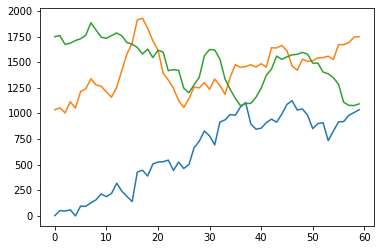

In [4]:
plt.plot(x[0])
plt.plot(x[1])
plt.plot(x[2])
plt.show()

In [5]:
!mkdir DATA
import csv
str0 = f"ts_L{L}_Z{Z}_A{A}_DX{DX}_bias{bias}_N{N}"
print(str0)
fname = "DATA/x_"+str0+".csv"

with open(fname, mode="w") as myfile:
    writer = csv.writer(myfile)
    for n in range(N):
        writer.writerow(x[n])

fname = "DATA/y_"+str0+".csv"
with open(fname, mode="w") as myfile:
    writer = csv.writer(myfile)
    writer.writerows(map(lambda yy:[yy],y))

ts_L60_Z12_A500_DX50_bias5_N10000


A subdirectory or file DATA already exists.


### ------------------------------------------------------------------------------------------------

In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from sklearn import metrics
import seaborn


10000


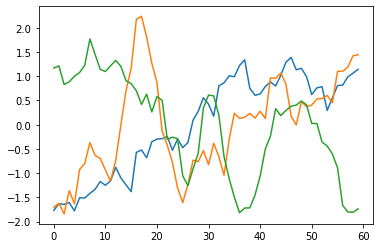

[1. 0. 0.]
10000 8000 2000 60


In [2]:
str0 = "ts_L60_Z12_A500_DX50_bias5_N10000"
fnamex = "DATA/x_"+str0+".csv"
fnamey = "DATA/y_"+str0+".csv"

x= np.loadtxt(fnamex, delimiter=",",dtype=float)
N = len(x)
print(N)

xm = x.mean(axis=1)
for n in range(N):
    x[n] = x[n] - xm[n]

std = x.std(axis=1)
for n in range(N):
    x[n] = x[n] / std[n]
    
    
plt.plot(x[0])
plt.plot(x[1])
plt.plot(x[2])
plt.show()

categ= np.loadtxt(fnamey, delimiter=",",dtype=int)
N_categ = 3
y = np.zeros((N,N_categ))
for n in range (N):
    y[n][categ[n]] = 1
print(y[0])

perc_train = 0.8
N_train = int(N*perc_train)
N_val = N-N_train

x_train = x[:N_train]
y_train = y[:N_train]
x_val = x[N_train:]
y_val = y[N_train:]

L = len(x[0])
print(N,N_train,N_val,L)



In [3]:
print(x)
print(y)

[[-1.76858829 -1.63096589 -1.64500899 ...  0.98666836  1.06250111
   1.14114248]
 [-1.70414802 -1.62048544 -1.84065012 ...  1.18881589  1.42219045
   1.44420692]
 [ 1.16802382  1.21217239  0.82807989 ... -1.79875963 -1.80758934
  -1.73695164]
 ...
 [-1.53153813 -1.83183972 -1.80942915 ...  0.28819989  0.49885921
   0.39577061]
 [-0.99402552 -0.94792282 -0.55604983 ...  1.21122048  1.60693536
   1.76445293]
 [-0.57317349 -0.6167682  -0.62258083 ...  2.11516665  2.1907308
   2.27792021]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


### DATA reshaping

In [8]:
x_train = x_train.reshape(x_train.shape[0],L,1)
x_val = x_val.reshape(x_val.shape[0],L,1)
input_shape = (L,1)

### Convolutional NN

In [28]:
from keras import initializers, regularizers
reg = regularizers.l1(0.001)
np.random.seed(12345)
ini = initializers.RandomNormal(mean=0,stddev=0.05)

model = Sequential()
model.add(Conv1D(filters=5,kernel_size=11,kernel_regularizer=reg,
                kernel_initializer=ini,
                activation="relu",
                input_shape=input_shape))
model.add(AveragePooling1D(5))
model.add(Conv1D(filters=5, kernel_size=7, activation="relu"))
model.add(Flatten())
model.add(Dense(10,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(N_categ, activation="softmax"))

print(model.summary())

from keras import optimizers
opt = optimizers.SGD(lr=0.01,momentum=0.9, nesterov=True, decay=1e-6)
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer="adam", metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_3 (Average (None, 10, 5)             0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 4, 5)              180       
_________________________________________________________________
flatten_3 (Flatten)          (None, 20)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                210       
_________________________________________________________________
dropout_3 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 3)                

In [29]:
batch_size = 250
epochs = 250

fit = model.fit(x_train, y_train,
               batch_size=batch_size, epochs=epochs,
               validation_data=(x_val,y_val),
               verbose=2, shuffle=True)

Epoch 1/250
28/28 - 1s - loss: 1.1019 - accuracy: 0.3287 - val_loss: 1.1009 - val_accuracy: 0.3243
Epoch 2/250
28/28 - 0s - loss: 1.0998 - accuracy: 0.3381 - val_loss: 1.0995 - val_accuracy: 0.3313
Epoch 3/250
28/28 - 0s - loss: 1.0981 - accuracy: 0.3510 - val_loss: 1.0978 - val_accuracy: 0.3330
Epoch 4/250
28/28 - 0s - loss: 1.0960 - accuracy: 0.3519 - val_loss: 1.0949 - val_accuracy: 0.3433
Epoch 5/250
28/28 - 0s - loss: 1.0915 - accuracy: 0.3727 - val_loss: 1.0887 - val_accuracy: 0.3737
Epoch 6/250
28/28 - 0s - loss: 1.0834 - accuracy: 0.3929 - val_loss: 1.0776 - val_accuracy: 0.3893
Epoch 7/250
28/28 - 0s - loss: 1.0656 - accuracy: 0.4184 - val_loss: 1.0513 - val_accuracy: 0.4370
Epoch 8/250
28/28 - 0s - loss: 1.0368 - accuracy: 0.4463 - val_loss: 1.0186 - val_accuracy: 0.4667
Epoch 9/250
28/28 - 0s - loss: 1.0134 - accuracy: 0.4511 - val_loss: 0.9932 - val_accuracy: 0.4780
Epoch 10/250
28/28 - 0s - loss: 0.9969 - accuracy: 0.4696 - val_loss: 0.9759 - val_accuracy: 0.4863
Epoch 11/

28/28 - 0s - loss: 0.6661 - accuracy: 0.6843 - val_loss: 0.6501 - val_accuracy: 0.7023
Epoch 84/250
28/28 - 0s - loss: 0.6627 - accuracy: 0.6844 - val_loss: 0.6487 - val_accuracy: 0.6993
Epoch 85/250
28/28 - 0s - loss: 0.6668 - accuracy: 0.6829 - val_loss: 0.6474 - val_accuracy: 0.6997
Epoch 86/250
28/28 - 0s - loss: 0.6669 - accuracy: 0.6851 - val_loss: 0.6478 - val_accuracy: 0.7010
Epoch 87/250
28/28 - 0s - loss: 0.6659 - accuracy: 0.6790 - val_loss: 0.6460 - val_accuracy: 0.7033
Epoch 88/250
28/28 - 0s - loss: 0.6624 - accuracy: 0.6840 - val_loss: 0.6443 - val_accuracy: 0.7060
Epoch 89/250
28/28 - 0s - loss: 0.6599 - accuracy: 0.6847 - val_loss: 0.6428 - val_accuracy: 0.7037
Epoch 90/250
28/28 - 0s - loss: 0.6600 - accuracy: 0.6850 - val_loss: 0.6437 - val_accuracy: 0.7060
Epoch 91/250
28/28 - 0s - loss: 0.6644 - accuracy: 0.6837 - val_loss: 0.6452 - val_accuracy: 0.7030
Epoch 92/250
28/28 - 0s - loss: 0.6587 - accuracy: 0.6850 - val_loss: 0.6427 - val_accuracy: 0.7037
Epoch 93/250


Epoch 165/250
28/28 - 0s - loss: 0.6141 - accuracy: 0.7106 - val_loss: 0.6080 - val_accuracy: 0.7247
Epoch 166/250
28/28 - 0s - loss: 0.6193 - accuracy: 0.7126 - val_loss: 0.6079 - val_accuracy: 0.7233
Epoch 167/250
28/28 - 0s - loss: 0.6120 - accuracy: 0.7089 - val_loss: 0.6079 - val_accuracy: 0.7247
Epoch 168/250
28/28 - 0s - loss: 0.6198 - accuracy: 0.7100 - val_loss: 0.6077 - val_accuracy: 0.7243
Epoch 169/250
28/28 - 0s - loss: 0.6211 - accuracy: 0.7069 - val_loss: 0.6075 - val_accuracy: 0.7247
Epoch 170/250
28/28 - 0s - loss: 0.6173 - accuracy: 0.7114 - val_loss: 0.6080 - val_accuracy: 0.7283
Epoch 171/250
28/28 - 0s - loss: 0.6110 - accuracy: 0.7144 - val_loss: 0.6064 - val_accuracy: 0.7263
Epoch 172/250
28/28 - 0s - loss: 0.6180 - accuracy: 0.7086 - val_loss: 0.6081 - val_accuracy: 0.7267
Epoch 173/250
28/28 - 0s - loss: 0.6109 - accuracy: 0.7136 - val_loss: 0.6060 - val_accuracy: 0.7263
Epoch 174/250
28/28 - 0s - loss: 0.6080 - accuracy: 0.7173 - val_loss: 0.6067 - val_accurac

28/28 - 0s - loss: 0.5868 - accuracy: 0.7389 - val_loss: 0.5888 - val_accuracy: 0.7497
Epoch 247/250
28/28 - 0s - loss: 0.5919 - accuracy: 0.7341 - val_loss: 0.5913 - val_accuracy: 0.7430
Epoch 248/250
28/28 - 0s - loss: 0.5888 - accuracy: 0.7349 - val_loss: 0.5908 - val_accuracy: 0.7383
Epoch 249/250
28/28 - 0s - loss: 0.5840 - accuracy: 0.7349 - val_loss: 0.5967 - val_accuracy: 0.7407
Epoch 250/250
28/28 - 0s - loss: 0.5866 - accuracy: 0.7323 - val_loss: 0.5893 - val_accuracy: 0.7437


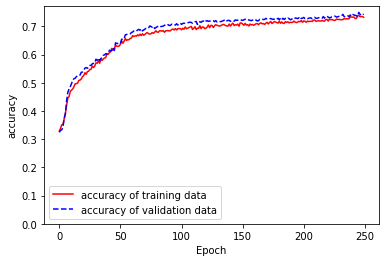

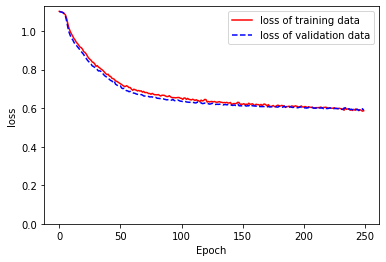

In [30]:
for obs in ('accuracy', 'loss'):
    plt.figure(figsize=(6,4))
    plt.plot(fit.history[obs], 'r',
            label=obs+' of training data')
    #dash line
    plt.plot(fit.history['val_'+obs],'b--',
            label=obs+' of validation data')
    plt.ylabel(obs)
    plt.xlabel('Epoch')
    plt.legend()
    plt.ylim(0)
    plt.show()
    

### Plot the weights of the filters in the first layer

w0T= [[[ 4.4484355e-02 -6.6678174e-02 -9.6394144e-02 -1.5597859e-01
   -1.6507713e-01 -4.5446824e-02  3.4992856e-05  2.5846241e-03
    1.7629758e-01  1.7735176e-01  4.6417672e-02]]

 [[-4.8645735e-01  4.3471973e-02  2.6384103e-01  1.7242758e-01
    6.3803308e-02  2.5497223e-03  9.8489888e-02  2.2133529e-01
    1.3756771e-01 -1.5799355e-02 -4.4948527e-01]]

 [[ 4.3122420e-01  1.7512393e-01 -9.4715804e-03 -1.1597557e-02
   -1.9550061e-01 -2.3981585e-01 -1.8072861e-01 -2.8167090e-01
   -3.0538756e-01 -7.1466230e-03  6.2884533e-01]]

 [[-2.2764984e-01 -5.1928680e-02 -6.4470641e-02 -9.6014217e-02
    1.0207804e-01  1.9065320e-01  8.2330875e-02  1.1714028e-01
    7.4546166e-02  2.3858095e-02 -1.1109108e-01]]

 [[ 2.2801062e-01 -4.6612236e-01  6.9616847e-02 -8.3199143e-03
    3.6264288e-01 -2.1267582e-02 -2.5670230e-01  1.1441608e-01
    1.6709289e-01 -4.8953980e-01  2.8690624e-01]]]
w01= [-0.25184157 -0.37316376 -0.24514608 -0.23940822 -0.06086084]
11
5


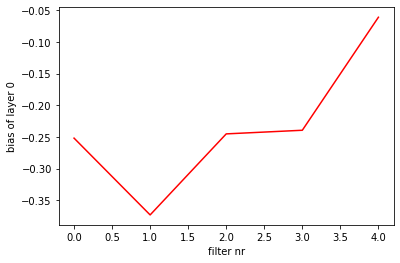

[-0.25184157 -0.37316376 -0.24514608 -0.23940822 -0.06086084]


In [13]:
c = ['k', 'r', 'y', 'b', 'a']
def plt_w(w):
    #Plot weight of convol. layer
    plt.figure(figsize=(6,4))
    for i in range(len(w)):
        plt.plot(w[i][0],c[i],label=str(i))
    plt.ylabel('weight')
    plt.xlabel('index')
    plt.legend()
    plt.show()
    
w0 = model.layers[0].get_weights()[0]    
w01 = model.layers[0].get_weights()[1]   
w0T = w0.T
print('w0T=', w0T)
print('w01=', w01)
print(len(w0))
print(len(w0T))

plt.plot(w01, 'r', label=str(i))
plt.ylabel('bias of layer 0')
plt.xlabel('filter nr')
plt.show()
print(w01)

### -----------------------------------------------------------------------------------------------------------------------------

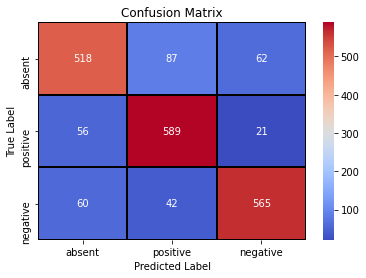

In [14]:
import seaborn as sn
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing

LABELS = ["absent", "positive", "negative"]

def confusion_matrix(validations, predictions):
    
    matrix = metrics.confusion_matrix(validations, predictions)
    sn.heatmap(matrix, xticklabels=LABELS,
              yticklabels=LABELS, annot=True,
              fmt='d',linecolor='black',linewidth=1,
              cmap='coolwarm')
    plt.title("Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

y_pred_val = model.predict(x_val)
max_y_pred_val = np.argmax(y_pred_val,axis=1)
max_y_val = np.argmax(y_val, axis=1)
confusion_matrix(max_y_val, max_y_pred_val)

### -----------------------------------------------------------------------------------------------------------------------------

10000


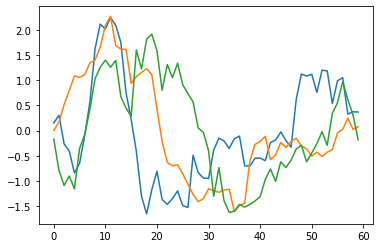

[0. 1. 0.]
10000 7000 3000 60


In [37]:
str1 = "ts_comp_N10000"
fnamex = "DATA1/x_"+str1+".csv"
fnamey = "DATA1/y_"+str1+".csv"

x= np.loadtxt(fnamex, delimiter=",",dtype=float)
N = len(x)
print(N)

xm = x.mean(axis=1)
for n in range(N):
    x[n] = x[n] - xm[n]

std = x.std(axis=1)
for n in range(N):
    x[n] = x[n] / std[n]
    
    
plt.plot(x[0])
plt.plot(x[1])
plt.plot(x[2])
plt.show()

categ= np.loadtxt(fnamey, delimiter=",",dtype=int)
N_categ = 3
y = np.zeros((N,N_categ))
for n in range (N):
    y[n][categ[n]] = 1
print(y[0])

perc_train = 0.7
N_train = int(N*perc_train)
N_val = N-N_train

x_train = x[:N_train]
y_train = y[:N_train]
x_val = x[N_train:]
y_val = y[N_train:]

L = len(x[0])
print(N,N_train,N_val,L)


In [38]:
x_train = x_train.reshape(x_train.shape[0],L,1)
x_val = x_val.reshape(x_val.shape[0],L,1)
input_shape = (L,1)

In [55]:
from keras import initializers, regularizers
reg = regularizers.l1(0.001)
np.random.seed(12345)
ini = initializers.RandomNormal(mean=0,stddev=0.05)

model = Sequential()
model.add(Conv1D(filters=5,kernel_size=11,kernel_regularizer=reg,
                kernel_initializer=ini,
                activation="relu",
                input_shape=input_shape))
model.add(AveragePooling1D(5))
model.add(Flatten())
model.add(Dense(8,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(6,activation="relu"))
model.add(Dense(5,activation="sigmoid"))
model.add(Dense(4,activation="tanh"))
model.add(Dense(N_categ, activation="softmax"))


print(model.summary())

from keras import optimizers
opt = optimizers.SGD(lr=0.01,momentum=0.9, nesterov=True, decay=1e-6)
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer="adam", metrics=['accuracy'])

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_16 (Conv1D)           (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_13 (Averag (None, 10, 5)             0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 50)                0         
_________________________________________________________________
dense_49 (Dense)             (None, 8)                 408       
_________________________________________________________________
dropout_13 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_50 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_51 (Dense)             (None, 5)               

In [56]:
batch_size = 250
epochs = 250

fit = model.fit(x_train, y_train,
               batch_size=batch_size, epochs=epochs,
               validation_data=(x_val,y_val),
               verbose=2, shuffle=True)

Epoch 1/250
28/28 - 1s - loss: 1.1014 - accuracy: 0.3341 - val_loss: 1.0995 - val_accuracy: 0.3313
Epoch 2/250
28/28 - 0s - loss: 1.0981 - accuracy: 0.3640 - val_loss: 1.0967 - val_accuracy: 0.3790
Epoch 3/250
28/28 - 0s - loss: 1.0955 - accuracy: 0.3754 - val_loss: 1.0931 - val_accuracy: 0.4117
Epoch 4/250
28/28 - 0s - loss: 1.0927 - accuracy: 0.3829 - val_loss: 1.0889 - val_accuracy: 0.4167
Epoch 5/250
28/28 - 0s - loss: 1.0887 - accuracy: 0.3904 - val_loss: 1.0835 - val_accuracy: 0.4297
Epoch 6/250
28/28 - 0s - loss: 1.0817 - accuracy: 0.4101 - val_loss: 1.0752 - val_accuracy: 0.4283
Epoch 7/250
28/28 - 0s - loss: 1.0733 - accuracy: 0.4097 - val_loss: 1.0647 - val_accuracy: 0.4447
Epoch 8/250
28/28 - 0s - loss: 1.0654 - accuracy: 0.4236 - val_loss: 1.0521 - val_accuracy: 0.4530
Epoch 9/250
28/28 - 0s - loss: 1.0530 - accuracy: 0.4346 - val_loss: 1.0400 - val_accuracy: 0.4680
Epoch 10/250
28/28 - 0s - loss: 1.0444 - accuracy: 0.4419 - val_loss: 1.0285 - val_accuracy: 0.4730
Epoch 11/

28/28 - 0s - loss: 0.8649 - accuracy: 0.5304 - val_loss: 0.8589 - val_accuracy: 0.5380
Epoch 84/250
28/28 - 0s - loss: 0.8678 - accuracy: 0.5231 - val_loss: 0.8561 - val_accuracy: 0.5433
Epoch 85/250
28/28 - 0s - loss: 0.8635 - accuracy: 0.5327 - val_loss: 0.8590 - val_accuracy: 0.5480
Epoch 86/250
28/28 - 0s - loss: 0.8656 - accuracy: 0.5277 - val_loss: 0.8536 - val_accuracy: 0.5513
Epoch 87/250
28/28 - 0s - loss: 0.8660 - accuracy: 0.5304 - val_loss: 0.8551 - val_accuracy: 0.5370
Epoch 88/250
28/28 - 0s - loss: 0.8691 - accuracy: 0.5251 - val_loss: 0.8588 - val_accuracy: 0.5447
Epoch 89/250
28/28 - 0s - loss: 0.8649 - accuracy: 0.5267 - val_loss: 0.8560 - val_accuracy: 0.5317
Epoch 90/250
28/28 - 0s - loss: 0.8634 - accuracy: 0.5237 - val_loss: 0.8567 - val_accuracy: 0.5373
Epoch 91/250
28/28 - 0s - loss: 0.8588 - accuracy: 0.5306 - val_loss: 0.8528 - val_accuracy: 0.5550
Epoch 92/250
28/28 - 0s - loss: 0.8595 - accuracy: 0.5321 - val_loss: 0.8541 - val_accuracy: 0.5450
Epoch 93/250


Epoch 165/250
28/28 - 0s - loss: 0.8007 - accuracy: 0.5563 - val_loss: 0.7936 - val_accuracy: 0.5687
Epoch 166/250
28/28 - 0s - loss: 0.8025 - accuracy: 0.5564 - val_loss: 0.7905 - val_accuracy: 0.5760
Epoch 167/250
28/28 - 0s - loss: 0.8022 - accuracy: 0.5573 - val_loss: 0.7889 - val_accuracy: 0.5693
Epoch 168/250
28/28 - 0s - loss: 0.7978 - accuracy: 0.5620 - val_loss: 0.7869 - val_accuracy: 0.5743
Epoch 169/250
28/28 - 0s - loss: 0.7958 - accuracy: 0.5626 - val_loss: 0.7841 - val_accuracy: 0.5787
Epoch 170/250
28/28 - 0s - loss: 0.7945 - accuracy: 0.5611 - val_loss: 0.7822 - val_accuracy: 0.5743
Epoch 171/250
28/28 - 0s - loss: 0.7982 - accuracy: 0.5637 - val_loss: 0.7822 - val_accuracy: 0.5700
Epoch 172/250
28/28 - 0s - loss: 0.7915 - accuracy: 0.5660 - val_loss: 0.7770 - val_accuracy: 0.5837
Epoch 173/250
28/28 - 0s - loss: 0.7881 - accuracy: 0.5676 - val_loss: 0.7773 - val_accuracy: 0.5840
Epoch 174/250
28/28 - 0s - loss: 0.7862 - accuracy: 0.5693 - val_loss: 0.7773 - val_accurac

28/28 - 0s - loss: 0.6510 - accuracy: 0.6991 - val_loss: 0.6431 - val_accuracy: 0.7160
Epoch 247/250
28/28 - 0s - loss: 0.6527 - accuracy: 0.7036 - val_loss: 0.6344 - val_accuracy: 0.7150
Epoch 248/250
28/28 - 0s - loss: 0.6567 - accuracy: 0.6990 - val_loss: 0.6441 - val_accuracy: 0.7100
Epoch 249/250
28/28 - 0s - loss: 0.6527 - accuracy: 0.7039 - val_loss: 0.6372 - val_accuracy: 0.7177
Epoch 250/250
28/28 - 0s - loss: 0.6554 - accuracy: 0.6990 - val_loss: 0.6348 - val_accuracy: 0.7127


By adding more Dense layers with maximum 600 trainable parameters, we can see that the model runs slightly qicker than the old model.  

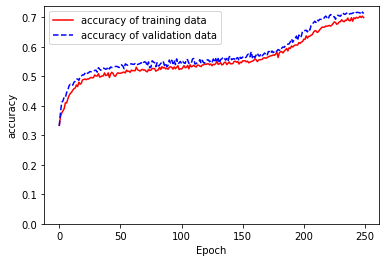

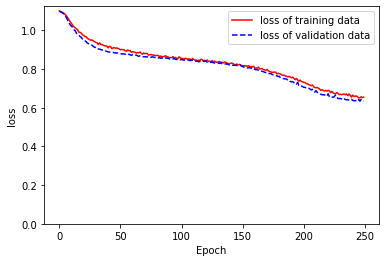

In [57]:
for obs in ('accuracy', 'loss'):
    plt.figure(figsize=(6,4))
    plt.plot(fit.history[obs], 'r',
            label=obs+' of training data')
    #dash line
    plt.plot(fit.history['val_'+obs],'b--',
            label=obs+' of validation data')
    plt.ylabel(obs)
    plt.xlabel('Epoch')
    plt.legend()
    plt.ylim(0)
    plt.show()
    